In [1]:
# import pandas as pd
# #print(pandas.__version__)
# import cv2 
# import numpy as np
# import tkinter as tk
# import matplotlib.pyplot as plt
# import csv

In [2]:
import cv2 #for image processing
#import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [3]:
#pip install tk

In [4]:
#pip install opencv_python

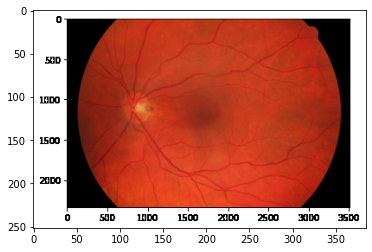

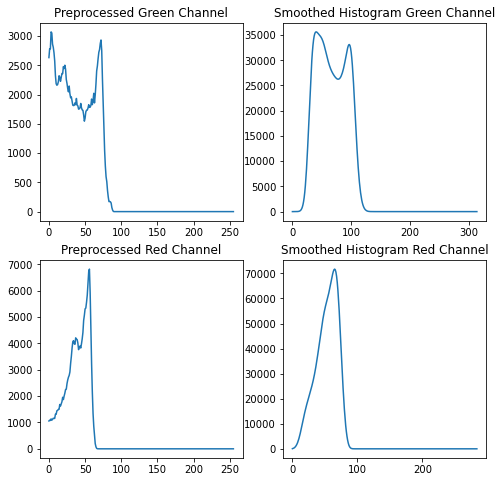

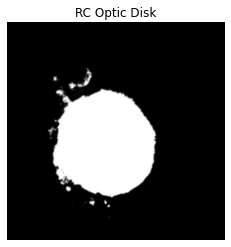

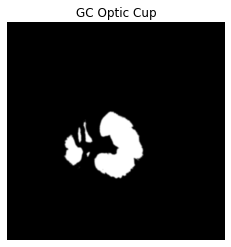

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Sarita16\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Sarita16\AppData\Local\Temp/ipykernel_7452/1905732878.py", line 273, in fileDialog
    cdr_cal = cdr(cup,disc,True)
  File "C:\Users\Sarita16\AppData\Local\Temp/ipykernel_7452/1905732878.py", line 127, in cdr
    cv2.ellipse(img,el_cup,(100,20,110),3)
cv2.error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'ellipse'
> Overload resolution failed:
>  - ellipse() missing required argument 'startAngle' (pos 5)
>  - ellipse() missing required argument 'startAngle' (pos 5)
>  - Can't parse 'box' as RotatedRect. Expected sequence length 3, got 4
>  - Can't parse 'box' as RotatedRect. Expected sequence length 3, got 4



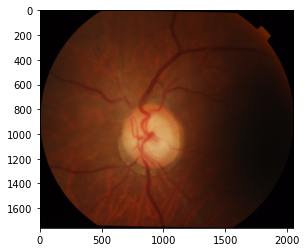

In [5]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

image = cv2.imread(r'C:\Users\Sarita16\Desktop\test\red-eye.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
def segment(image,plot_seg,plot_hist):

    image = image[400:1500,400:1500,:] 

    Abo,Ago,Aro = cv2.split(image) 
    M = 60
    filter = signal.gaussian(M, std=6)
    STDf = filter.std()
    

    Ar = Aro - Aro.mean() - Aro.std() 
    Mr = Ar.mean()          
    SDr = Ar.std()                          
    Thr = 0.5*M - 2*STDf - SDr            

    
    M = 30
    filter_cup = signal.gaussian(M, std=6) 
    STDf = filter_cup.std()  

    Ag = Ago - Ago.mean() - Ago.std()
    Mg = Ag.mean()                        
    SDg = Ag.std()                        
    Thg = 0.5*M +2*STDf + 2*SDg + Mg     
    #print(Thg)
    
    
    hist,bins = np.histogram(Ag.ravel(),256,[0,256])  
    histr,binsr = np.histogram(Ar.ravel(),256,[0,256])
    #plt.hist(image.ravel(),255,[0,256])
    #plt.show()
   # histt=cv2.calcHist([image],[0],None,[256],[0,256])
  #  plt.plot(histt)
  #  plt.show()

    smooth_hist_g=np.convolve(filter,hist)  
    smooth_hist_r=np.convolve(filter_cup,histr) 
    
    if plot_hist:
        plt.figure(figsize = (8,8))
        plt.subplot(2, 2, 1)
        plt.plot(hist)
        plt.title("Preprocessed Green Channel")

        plt.subplot(2, 2, 2)
        plt.plot(smooth_hist_g)
        plt.title("Smoothed Histogram Green Channel")

        plt.subplot(2, 2, 3)
        plt.plot(histr)
        plt.title("Preprocessed Red Channel")

        plt.subplot(2, 2, 4)
        plt.plot(smooth_hist_r)
        plt.title("Smoothed Histogram Red Channel")

        plt.show()
    
    r,c = Ag.shape
    Dd = np.zeros(shape=(r,c)) 
    Dc = np.zeros(shape=(r,c)) 

    for i in range(1,r):
        for j in range(1,c):
            if Ar[i,j]>Thr:
                Dd[i,j]=255
            else:
                Dd[i,j]=0

    for i in range(1,r):
        for j in range(1,c):
        
            if Ag[i,j]>Thg:
                Dc[i,j]=255
            else:
                Dc[i,j]=0
    
    cv2.imwrite(r'C:\Users\Sarita16\Desktop\test\output\disk.png',Dd)
    plt.imsave(r'C:\Users\Sarita16\Desktop\test\output\cup.png',Dc)
     
    #cv2.imwrite('C:/Users/lenovo/Desktop/output/disk.png',Dd)
    #plt.imsave('C:/Users/lenovo/Desktop/output/cup.png',Dc)
    
    if plot_seg:
        plt.imshow(Dd, cmap = 'gray', interpolation = 'bicubic')
        plt.axis("off")
        plt.title("RC Optic Disk")
        plt.show()
        
        plt.imshow(Dc, cmap = 'gray', interpolation = 'bicubic')
        plt.axis("off")
        plt.title("GC Optic Cup")
        plt.show()

def cdr(cup,disc,plot):
    
    #morphological closing and opening operations
    R1 = cv2.morphologyEx(cup, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)), iterations = 1)
    r1 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 1)
    R2 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,21)), iterations = 1)
    r2 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,1)), iterations = 1)
    R3 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33)), iterations = 2)
    img = R3
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #Getting all possible contours in the segmented image
    cup_diameter = 0
    largest_area = 0
    el_cup = contours[0]
    el_cup = el_cup.astype(int)
    if len(contours) != 0:
        for i in range(len(contours)):
            if len(contours[i]) >= 5:
                area = cv2.contourArea(contours[i]) 
                if (area>largest_area):
                    largest_area=area
                    index = i
                    el_cup = cv2.fitEllipse(contours[i])
                
    cv2.ellipse(img,el_cup,(100,20,110),3)  
    x,y,w,h = cv2.boundingRect(contours[index]) 
    cup_diameter = max(w,h) 
    print("CUP Diameter :")
    print(cup_diameter)
   # print(contours)
    #morphological closing and opening operations
    R1 = cv2.morphologyEx(disc, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)), iterations = 1)
    r1 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 1)
    R2 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,21)), iterations = 1)
    r2 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,1)), iterations = 1)
    R3 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33)), iterations = 1)
    r3 = cv2.morphologyEx(R3, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(43,43)), iterations = 1)
    img2 = r3
    
    ret,thresh = cv2.threshold(img2,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    disk_diameter = 0
    largest_area = 0
    el_disc = el_cup
    if len(contours) != 0:
          for i in range(len(contours)):
            if len(contours[i]) >= 5:
                area = cv2.contourArea(contours[i]) 
                if (area>largest_area):
                    largest_area=area
                    index = i
                    el_disc = cv2.fitEllipse(contours[i])
                    
            cv2.ellipse(img2,el_disc,(140,60,150),10) 
            x,y,w,h = cv2.boundingRect(contours[index]) 
    disk_diameter = max(w,h)
    print("Disk Diameter :")
    print(disk_diameter) 
  #  print(contours)
    if plot:
        plt.imshow(img2, 'gray',interpolation = 'bicubic')
        plt.axis("off")
        plt.title("RC Optic Disk")
        plt.show()
        plt.imshow(img, 'gray')
        plt.axis("off")
        plt.title("GC Optic Cup")
        plt.show()
    if(disk_diameter == 0): return 1 
    cdr = cup_diameter/disk_diameter 
    return cdr      

#cv2.imread('C:/Users/lenovo/Desktop/output/cup.png',0)
from scipy import signal
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from PIL import Image, ImageTk
import tkinter.messagebox


class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Glaucoma Detection")
        self.minsize(640, 400)
        self.configure(bg='LightSkyBlue')

        # Create a photoimage object of the image in the path
        image1 = Image.open(r"C:\Users\Sarita16\Desktop\test\medical.png")
        test = ImageTk.PhotoImage(image1)

       # root = Tk()

# Create a photoimage object of the image in the path
        image1 = Image.open(r"C:\Users\Sarita16\Desktop\test\medical.png")
        test = ImageTk.PhotoImage(image1)

        label1 = tkinter.Label(image=test)
        label1.image = test
        label1.configure(bg='LightSkyBlue')
        
        # Position image
        label1.place( height=700, width=1500,anchor=CENTER,relx=0.5, rely=0.3)

        image2 = Image.open(r"C:\Users\Sarita16\Desktop\test\preview-1.webp")
        test = ImageTk.PhotoImage(image2)

        label2 = tkinter.Label(image=test)
        label2.image = test
        label2.configure(bg='LightSkyBlue')
        
        # Position image
        label2.place( height=500, width=800,anchor=CENTER,relx=0.8, rely=0.8)

        image3 = Image.open(r"C:\Users\Sarita16\Desktop\test\preview-2.webp")
        test = ImageTk.PhotoImage(image3)

        label3 = tkinter.Label(image=test)
        label3.image = test
        label3.configure(bg='LightSkyBlue')
        
        # Position image
        label3.place( height=500, width=800,anchor=CENTER,relx=0.1, rely=0.2)

        self.labelFrame = ttk.LabelFrame(self, text = "To check about Glaucoma eye disease ")
        self.labelFrame.grid(column = 0, row = 2, padx = 520, pady = 400)
        
        self.button()
        


    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse a Fundus Image",command = self.fileDialog)
        self.button.grid(column = 1, row = 2,ipadx=50,ipady=20, padx = 45, pady = 20)


    
    
    def fileDialog(self):

        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
        #print(self.filename)
        stri=self.filename
        #print(stri)
        img = Image.open(self.filename)
        img = img.resize((250, 250)) 
        photo = ImageTk.PhotoImage(img)
        self.label2 = Label(image=photo)
        self.label2.image = photo
        #photo.resize(250,250)
        self.label2.grid(column=3, row=4)
        CDR = [] 
        VAL = [] 
        count = 1
        set_path =stri 
        # GET DATA
        #X_all,file_codes_all,exp1,exp2,exp3,exp4,file_names = extract_DRISHTI_GS_train(set_path,True,False)
        image = cv2.imread(set_path,1)
        segment(image,True,True)
            #name = file_names[i][47:]
        image = cv2.imread(set_path)
        #print(set_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        cup = cv2.imread(r'C:\Users\Sarita16\Desktop\test\cup.png',0) 
        disc = cv2.imread(r'C:\Users\Sarita16\Desktop\test\disk.png',0) 
        cdr_cal = cdr(cup,disc,True)
        
        CDR.append(cdr_cal)
        if(cdr_cal <= 0.3):
            stri="Not Glaucoma !! Relax "
        elif(cdr_cal > 0.3 and cdr_cal <=0.5):
            stri="Moderate Glaucoma !! Please Refer to Doctor and Get Proper Medication "
            #self.label =ttk.Label(self.labelFrame, text = "ref doc")
            #self.label.grid(column = 1, row = 2)
        elif(cdr_cal>0.5):
            stri="Heavily Glaucoma !! !! Please Refer to Doctor and Get Proper Medication"
            #self.label =ttk.Label(self.labelFrame, text = "ref doc")
            #self.label.grid(column = 1, row = 2)
        else:
            stri="none"
            #strii.append(stri)
            #table.append([file_codes_all[count], exp1[count], exp2[count], exp3[count], exp4[count], cdr_cal, stri])
            
        print('Pred_cdr:',cdr_cal)
        print('Result:' ,stri)
        count+=1
        
        messagebox.showinfo("Result",stri) 
      
    
    
            
root = Root()
root.mainloop()

